<a href="https://colab.research.google.com/github/AruntejaLonka/Cardiovascular-Risk-Prediction/blob/main/Copy_of_Copy_of_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Team Members:** 1) ArunTeja Lonka  2) Upasana Kumari  3) Zunaid  4) Sukesh shetty

 **Problem Statement:**
 The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

* Sex: male or female("M" or "F")
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) Behavioral
* Is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) Medical( history)
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal) Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous) Predict variable (desired target)
10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

In [1]:
#mounting drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **1.Setting the Stage**

### **Importing Libraries**




In [2]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [3]:
#copy the data set path
path  = "/content/drive/MyDrive/Data sets/data_cardiovascular_risk (1).csv"

# **Loading Dataset and Analysing**

In [4]:
df = pd.read_csv(path)

In [5]:
#analyzing first five rows
df.head()


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [6]:
#analysing last five rows
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [7]:
#Identify different charachteristics of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [8]:
#Identify the size
df.shape

(3390, 17)

In [9]:
#Check the Statistical discription of numerical value in dataset
#Crunch the numbers   
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3390.0,1694.500000,978.753033,0.00,847.25,1694.50,2541.75,3389.0
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0


# **Missing/NULL Values Treatment**

## Looking for the lost souls
* Why look for the null values? - these unrecorded information might play a prominent role in our analysis by providing us with important answers to hidden questions, might even lead us towards false predicitons and sometimes may not even affect at all. So it's always a better practice to catch the lost souls before moving on.

* Few doubts that pop up in our analytical minds are...

  * How ubiquitous are the missing values?
  * Are they random?
  * Do they show a pattern?

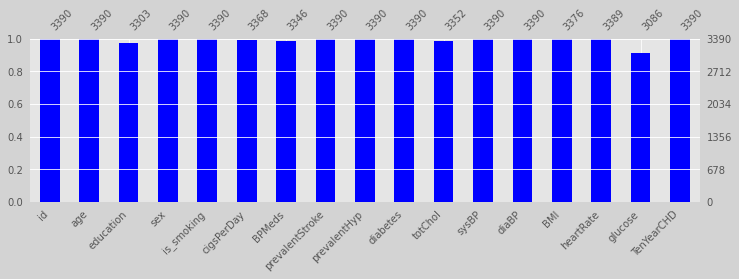

In [10]:
#Visualize the missing values
import missingno as msno
plt.figure(facecolor='lightgray')
msno.bar(df,color='blue',figsize=[12,3],fontsize=10)
plt.show()

## Moving on with the next steps, let's take a sneak peek at the count and percentages of the null values before we proceed further...

In [11]:
#Dig into the count and percentages
tot_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum()* 100 / len(df)).round(2).sort_values(ascending=False)
lost_souls = pd.concat([tot_missing, percent_missing], axis=1, keys=['Total', 'Percentage'])
lost_souls.head(20)

,Total,Percentage
glucose,304,8.97
education,87,2.57
BPMeds,44,1.30
totChol,38,1.12
cigsPerDay,22,0.65
BMI,14,0.41
heartRate,1,0.03
id,0,0.00
diaBP,0,0.00
sysBP,0,0.00


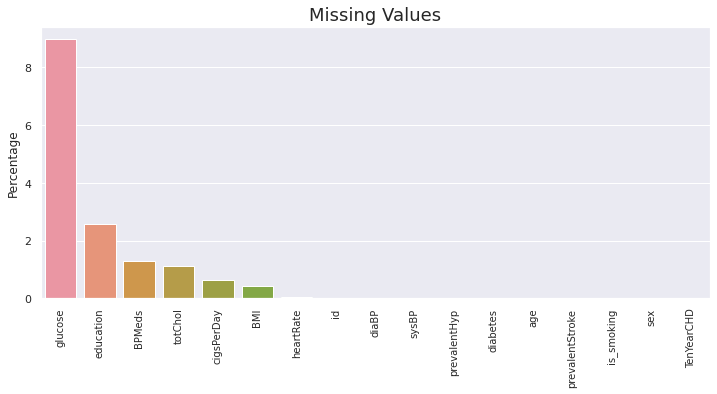

In [12]:
#Visualize the numbers
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(12,5)})

vis_missing = sns.barplot(x=lost_souls.index, y='Percentage', data=lost_souls)

vis_missing.set_title('Missing Values', fontsize = 18)
vis_missing.set_xticklabels(vis_missing.get_xmajorticklabels(), fontsize =10, rotation=90)
plt.show()

Mmmmm...magnificent! This reveals columns "glucose" , "education","BPMeds" , 'totChol', "cigsPerDay", and "BMI".
only need a quick replacement with the ever loving number '0' used when filling up the null values in data analysis. But before that let's get rid of the unwanted!

## Why remove them? 
Columns "id" is the irrelevant and insignificant to our data analysis since they will not provide crucial insights to our questions. Hence, we shall take our first move by removing them...

In [13]:
#Kick out the misfits
df.drop(['id'],axis=1,inplace=True)

In [14]:
#A quick look at the new results
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


Voila! Done and dusted! Removing the misfits have cleared the path to a better concise understanding of the dataset. What else is better than data that's not noisy!

But, One more step to go...

## Bringing in the most wanted!

In [15]:
#Shows the required data
list(df.columns)

['age',
 'education',
 'sex',
 'is_smoking',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

Filling the rows which has higher than 5% null and lower than 30% null values

In [16]:
# Before making changes in the Data we have to amke a copy of it.
df_copy=df.copy()

In [17]:
#filling null values with 0
df_copy=df_copy.fillna(0)


In [18]:
#checking for null values
df_copy.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [19]:
#Check the full info of data
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


###Target Variable

In [20]:
df_copy['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

# **Explanatory Data Analysis**

In [21]:
#Storing all the features which has continuous values
continuous_variables = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

In [22]:
other_variables = ['education','sex','is_smoking','prevalentStroke','prevalentHyp','diabetes']

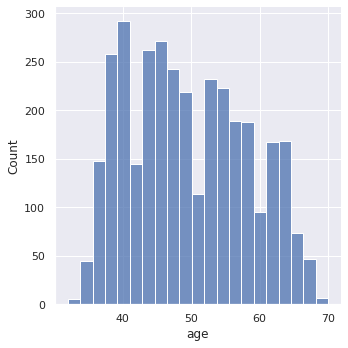

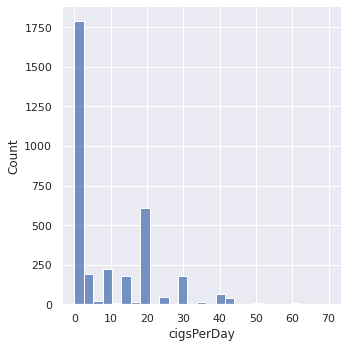

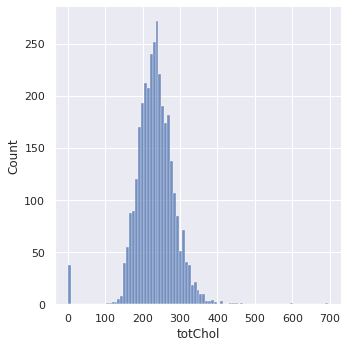

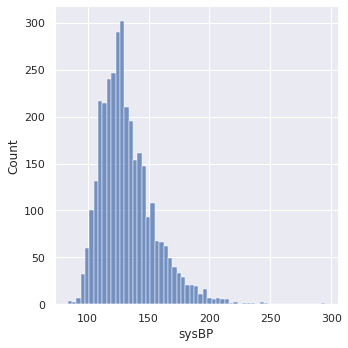

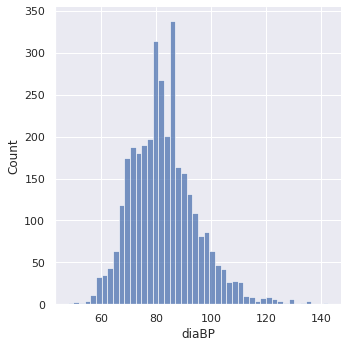

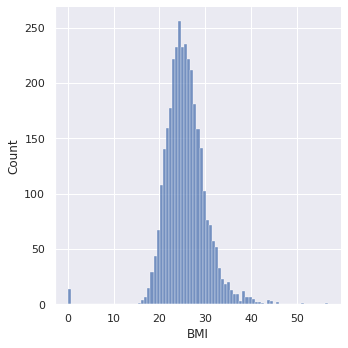

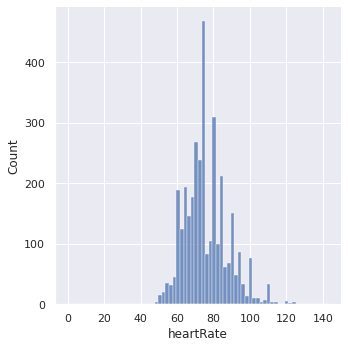

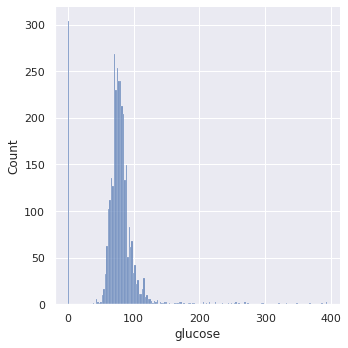

In [23]:
#Analyzing the distribution of all the features which has continuous values
for col in continuous_variables:
  sns.displot(df_copy[col])
plt.show()

**Age**

In [24]:
df_copy['age'].value_counts()

40    148
42    145
41    144
46    140
39    139
44    135
48    134
45    131
43    127
38    119
52    118
55    116
50    115
53    114
51    114
47    108
54    107
49    104
57     97
58     95
60     95
63     93
59     93
56     92
61     87
62     80
64     75
36     75
37     73
65     43
67     33
66     30
35     29
34     16
68     14
69      5
33      4
70      2
32      1
Name: age, dtype: int64

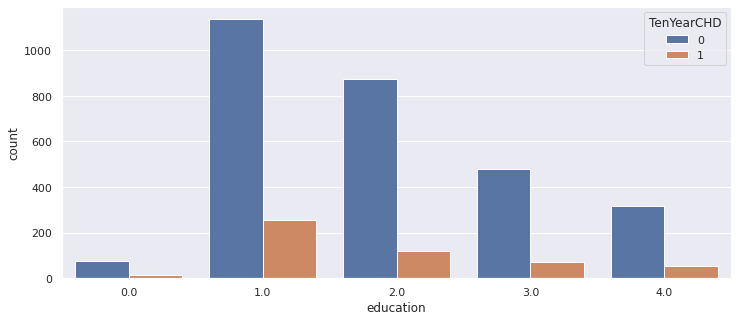

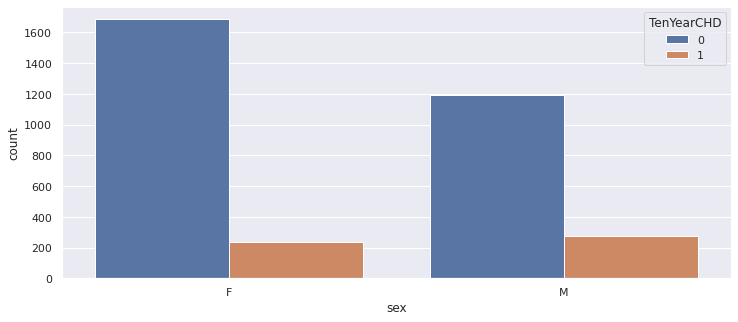

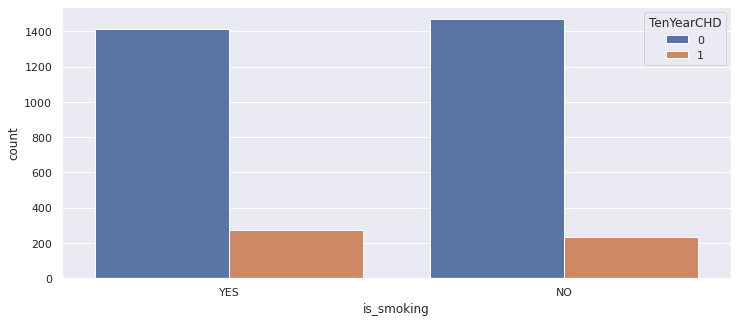

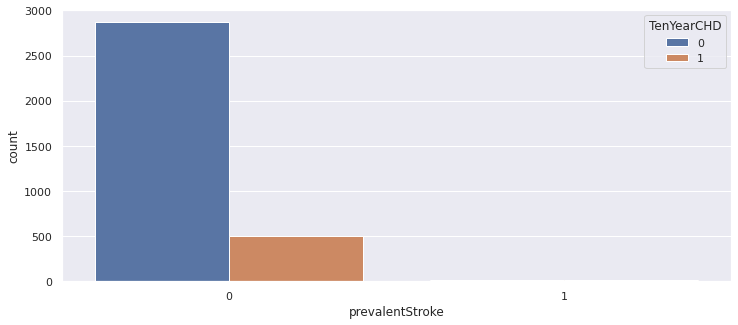

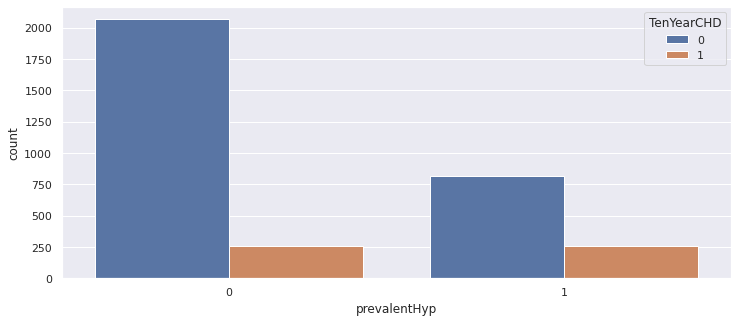

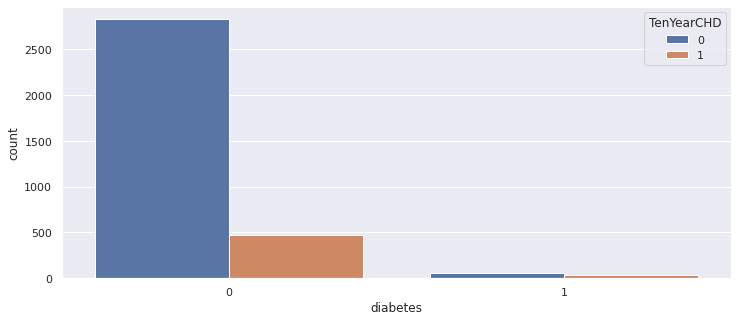

In [25]:
#Counting all the encoded values where dependent variable is the parameter
for col in other_variables:
  sns.countplot(x=df_copy[col],hue=df['TenYearCHD'],data=df_copy)
  plt.show()

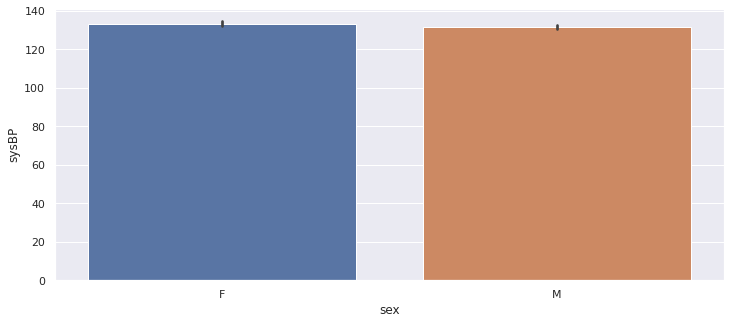

In [26]:
#sysBP varying amomng the genders
sns.barplot(x=df_copy['sex'],y=df_copy['sysBP'],data=df_copy)

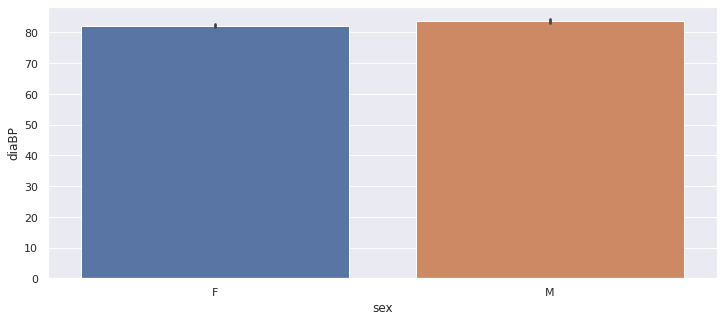

In [27]:
#diaBP varying among the genders
sns.barplot(x=df_copy['sex'],y=df_copy['diaBP'],data=df_copy)

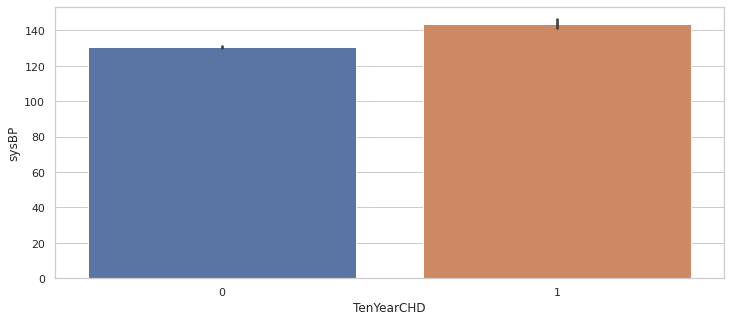

In [ ]:
#sysBP of a person who is at risk and who isn't
sns.barplot(x=df_copy['TenYearCHD'],y=df_copy['sysBP'],data=df)

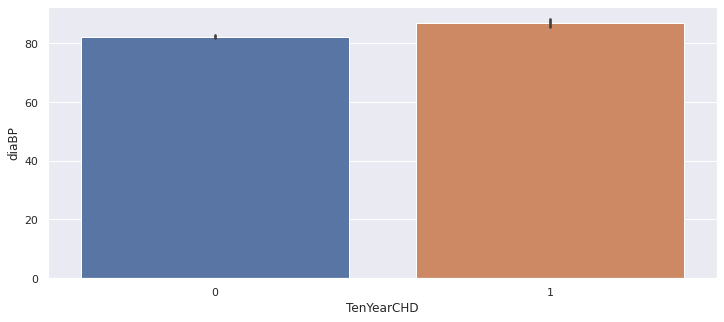

In [28]:
#diaBP of a person who is at risk and who isn't
sns.barplot(x=df_copy['TenYearCHD'],y=df_copy['diaBP'],data=df)

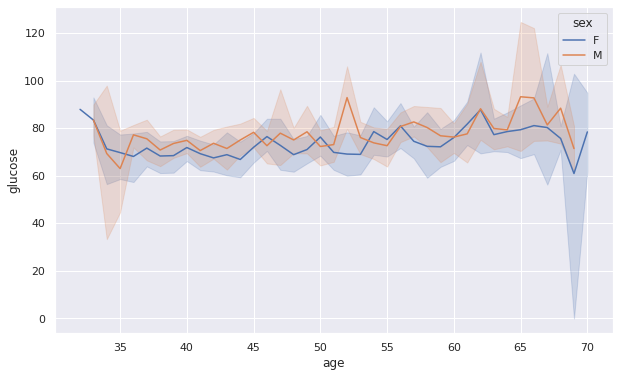

In [29]:
#Finding When a person gets old how much their glucose level varies
plt.figure(figsize=(10,6))
sns.lineplot(x=df_copy['age'],y=df_copy['glucose'],hue=df_copy['sex'],data=df_copy)

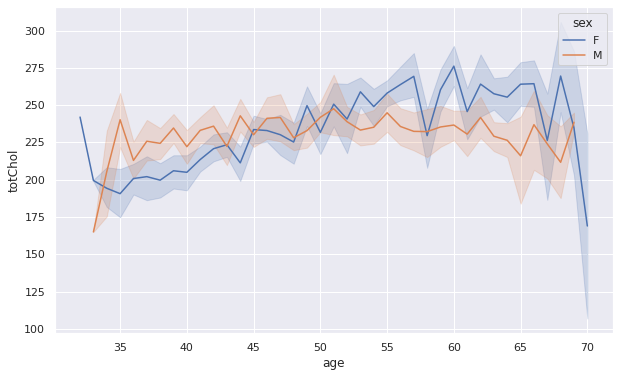

In [30]:
#Finding when a person gets old how much Cholestrol level varies
plt.figure(figsize=(10,6))
sns.lineplot(x=df_copy['age'],y=df_copy['totChol'],hue=df_copy['sex'],data=df_copy)

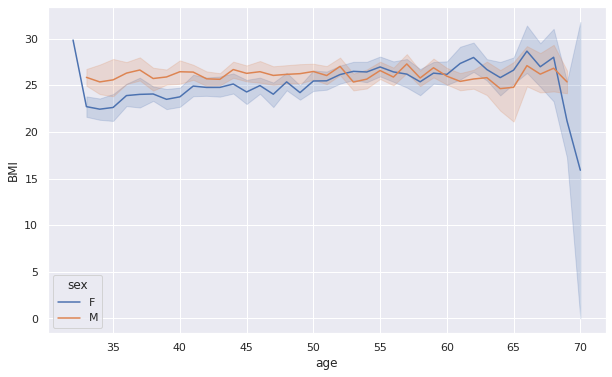

In [31]:
#Finding when a person gets old how much their BMI level varies
plt.figure(figsize=(10,6))
sns.lineplot(x=df_copy['age'],y=df_copy['BMI'],hue=df_copy['sex'],data=df_copy)

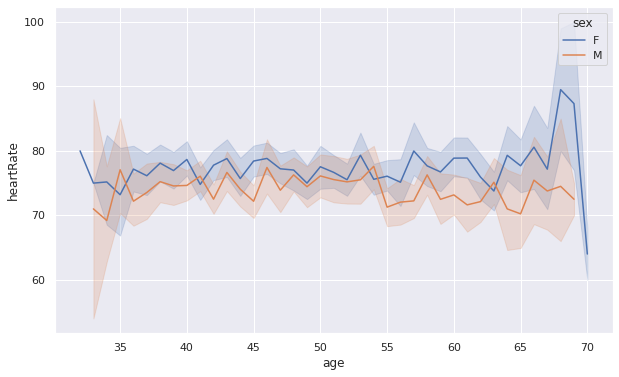

In [32]:
#Finding when a person gets old how much their heart rate level varies
plt.figure(figsize=(10,6))
sns.lineplot(x=df_copy['age'],y=df_copy['heartRate'],hue=df_copy['sex'],data=df_copy)

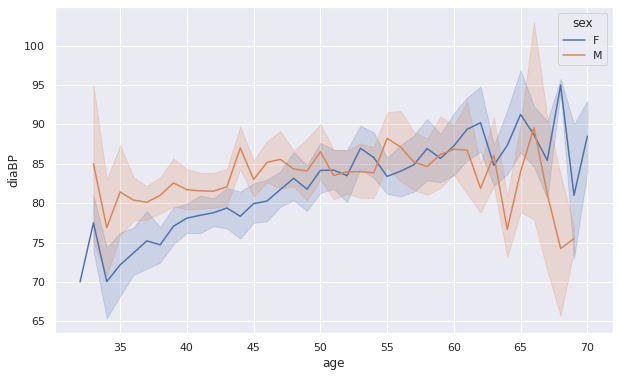

In [33]:
#Finding when a person gets old how much their diaBP level varies
plt.figure(figsize=(10,6))
sns.lineplot(x=df_copy['age'],y=df_copy['diaBP'],hue=df_copy['sex'],data=df_copy)

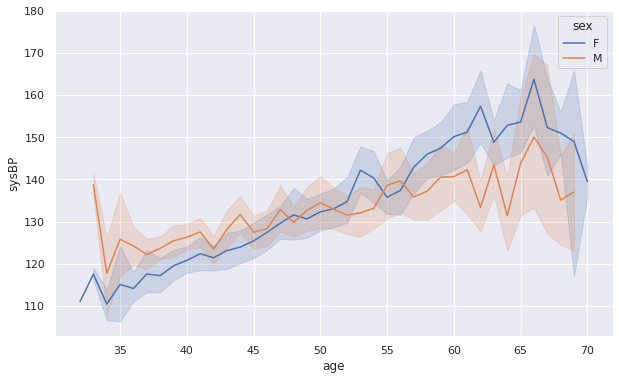

In [34]:
#Finding when a person gets old how much their sysBP level varies
plt.figure(figsize=(10,6))
sns.lineplot(x=df_copy['age'],y=df_copy['sysBP'],hue=df_copy['sex'],data=df_copy)

# Handling Outliers

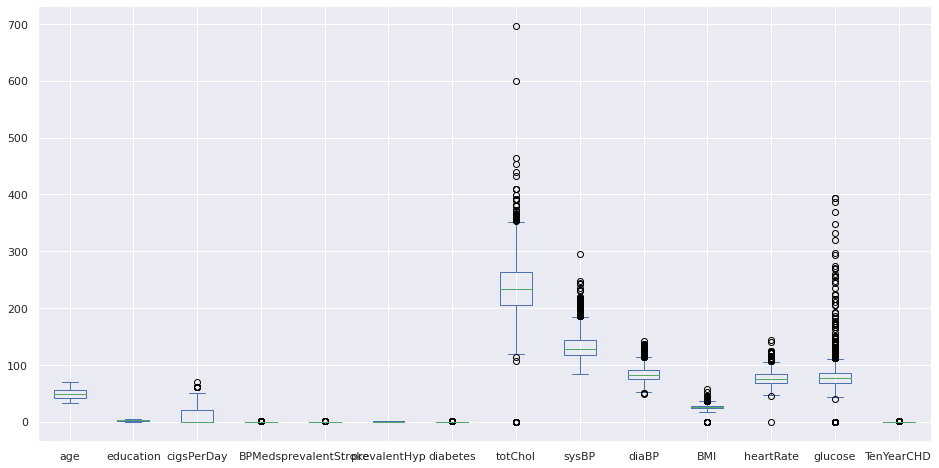

In [35]:
#Box Plot for analyzing the outliers
df_copy.plot(kind='box',figsize=(16,8))

In [36]:
#Stored all the features where we want to remove outliers
outlier_col = ['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

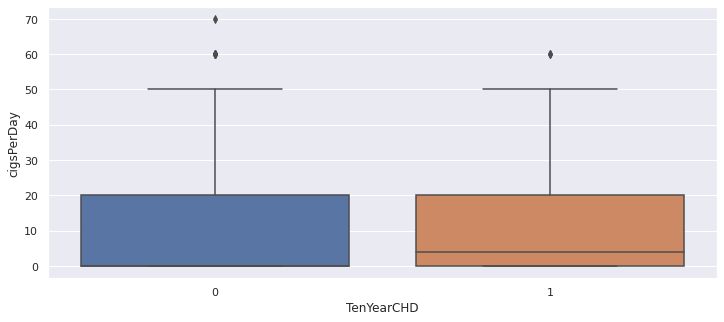

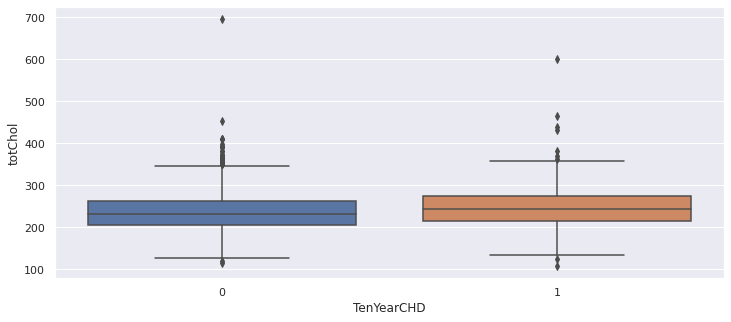

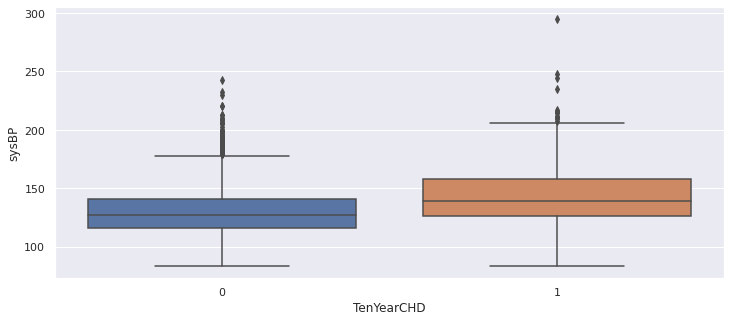

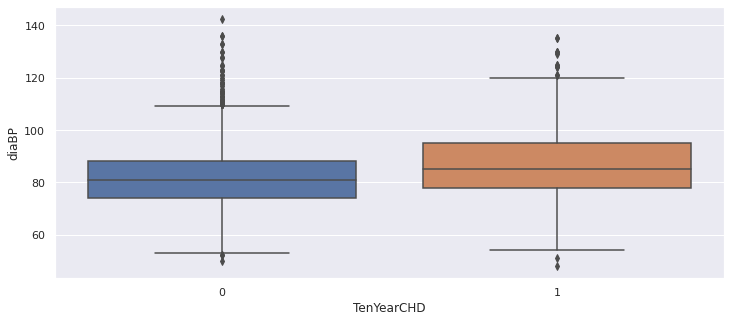

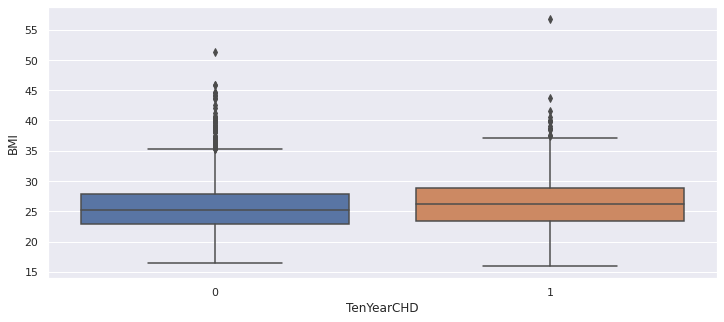

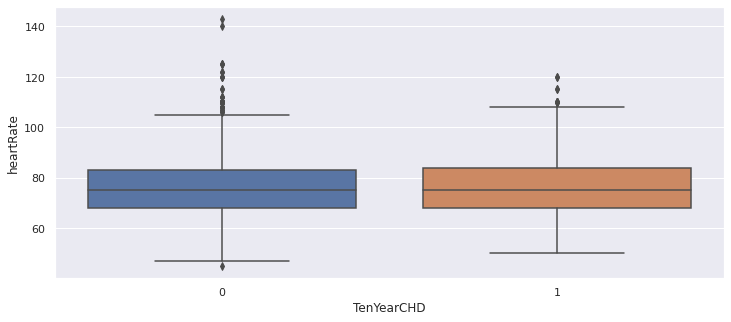

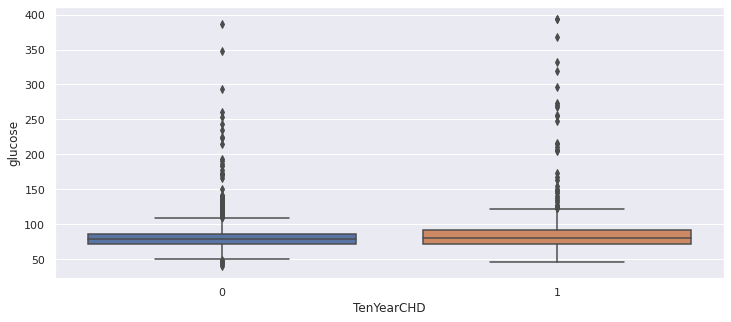

In [37]:
#Analyzing the outlier columns
for col in outlier_col:
  sns.boxplot(x=df['TenYearCHD'],y=df[col],data=df)
  plt.show()

In [38]:
#Handling Outliers
df[outlier_col]=df[outlier_col].clip(lower=df[outlier_col].quantile(0.15),upper=df[outlier_col].quantile(0.85),axis=1)

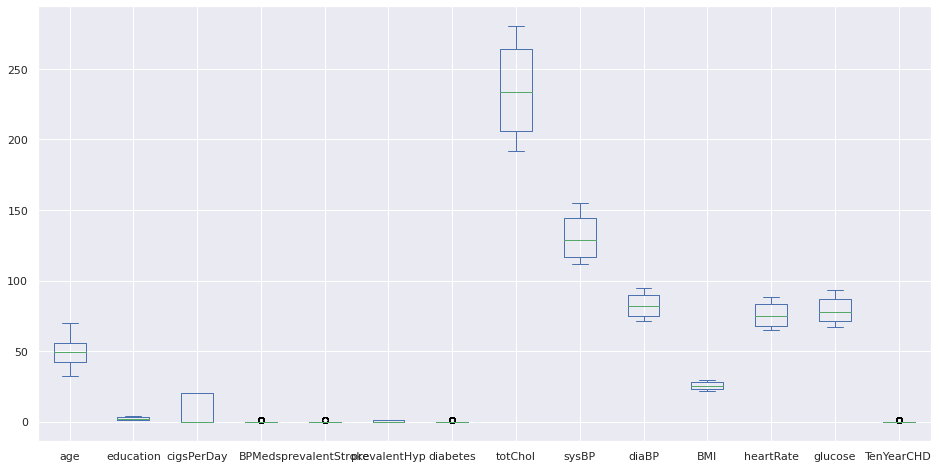

In [39]:
#Box plot after handling outliers
df.plot(kind='box',figsize=(16,8))

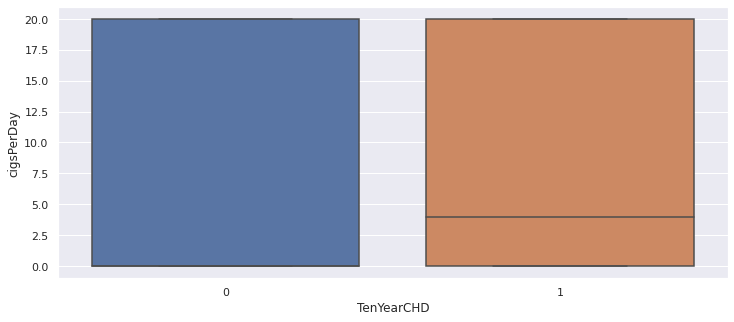

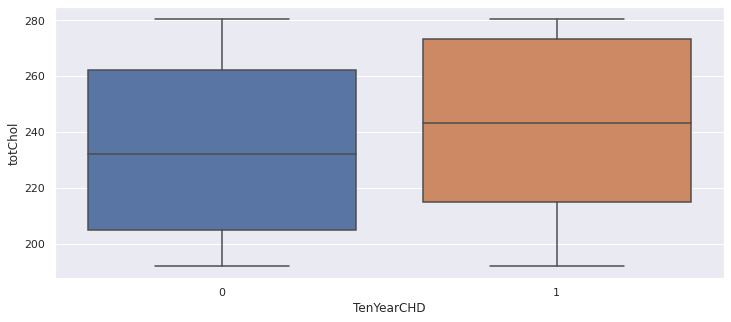

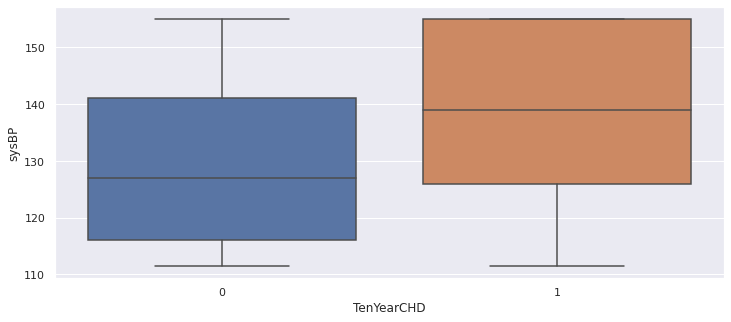

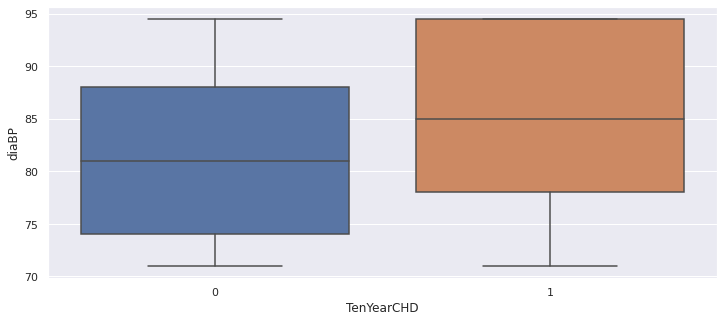

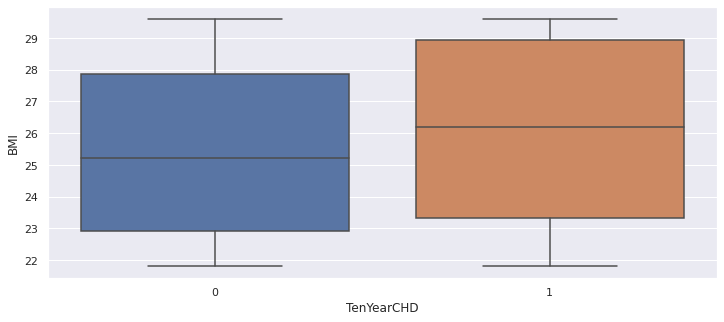

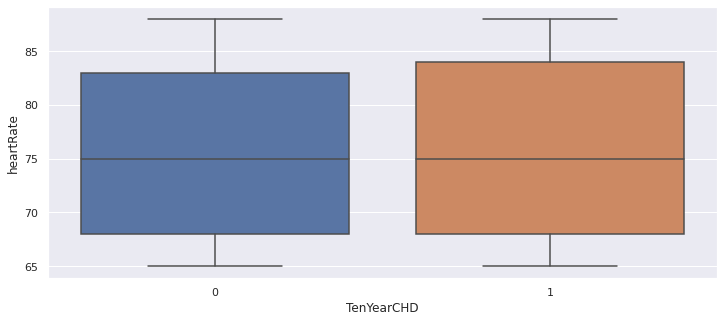

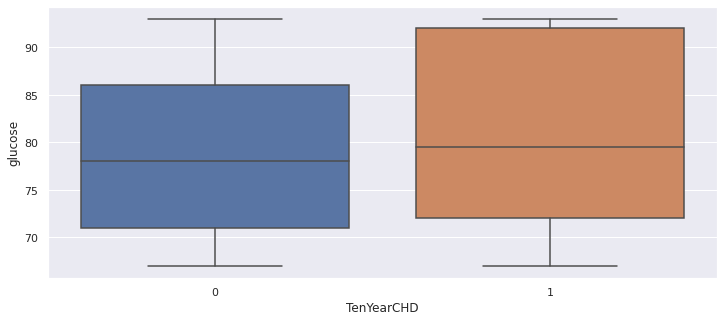

In [40]:
for col in outlier_col:
  sns.boxplot(x=df['TenYearCHD'],y=df[col],data=df)
  plt.show()

# Multicollinearity

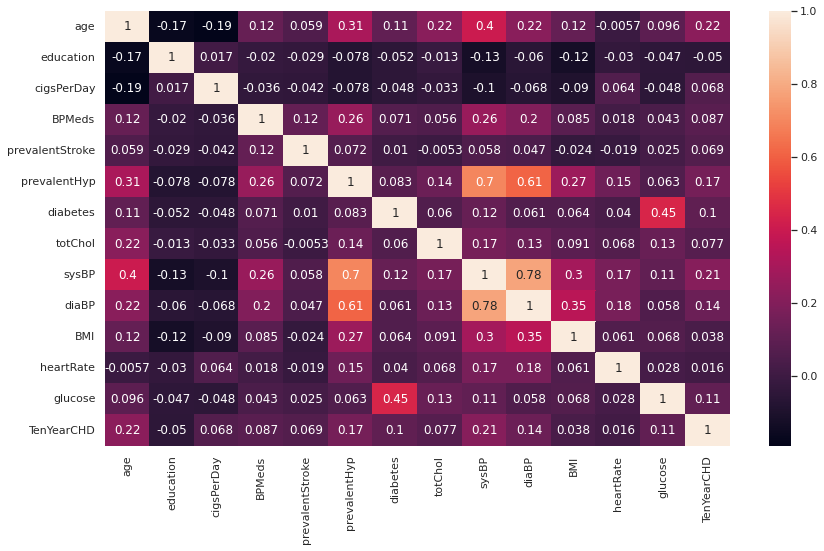

In [41]:
# Heatmap:
plt.figure(figsize=(14,8))
sns.heatmap(df_copy.corr(),annot=True)

In [42]:
# Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [43]:
calc_vif(df_copy[[i for i in df_copy.describe().columns ]])

,variables,VIF
0,age,39.557400
1,education,4.226936
2,cigsPerDay,1.642276
3,BPMeds,1.131159
4,prevalentStroke,1.031052
5,prevalentHyp,2.362192
6,diabetes,1.292176
7,totChol,22.834471
8,sysBP,132.993532
9,diaBP,127.792557


sysBp means systolic blood pressure and diaBP means diastolic blood pressure are correalted to eaach other but we cannot drop these columns as 
Blood pressure is measured using two numbers: The first number, called systolic blood pressure, measures the pressure in your arteries when your heart beats. The second number, called diastolic blood pressure, measures the pressure in your arteries when your heart rests between beats.

# Label Encoding

In [44]:
#Mapping the Variables
df_copy['is_smoking']=df_copy['is_smoking'].map({'YES':1,'NO':0})
df_copy['sex']=df_copy['sex'].map({'M':0,'F':1})

In [45]:
df_copy.head(2)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,1,1,3.0,0.0,0,0,0,221.0,148.0,85.0,0.00,90.0,80.0,1
1,36,4.0,0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0


# Feature Selection

In [46]:
X = df_copy.iloc[:,0:-1].values
y=df_copy['TenYearCHD'].values

In [47]:
X

array([[64.  ,  2.  ,  1.  , ...,  0.  , 90.  , 80.  ],
       [36.  ,  4.  ,  0.  , ..., 29.77, 72.  , 75.  ],
       [46.  ,  1.  ,  1.  , ..., 20.35, 88.  , 94.  ],
       ...,
       [44.  ,  3.  ,  0.  , ..., 28.92, 73.  , 72.  ],
       [60.  ,  1.  ,  0.  , ..., 23.01, 80.  , 85.  ],
       [54.  ,  3.  ,  1.  , ..., 29.88, 79.  , 92.  ]])

In [48]:
y

array([1, 0, 0, ..., 1, 0, 0])

In [49]:
X.shape,y.shape

((3390, 15), (3390,))

# Splitting & Scaling data

In [50]:
#Splitting the data into training and testing dataset
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 

In [51]:
#Checking the shape of our training and testing datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2712, 15)
(678, 15)
(2712,)
(678,)


In [52]:
#Using Standard Scaler to scale 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

# Implementing Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
Log = LogisticRegression()

In [54]:
#Fitting the training datasets
Log.fit(X_train,y_train)

LogisticRegression()

In [55]:
#predicting on training dataset
y_pred_log_train = Log.predict(X_train)

In [56]:
#predicting on testing dataset
y_pred_log_test = Log.predict(X_test)

## Classification Evaluation Metrics on Logistic Regression.

In [57]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [58]:
#Accuracy score of training
log_acc_train = accuracy_score(y_train,y_pred_log_train)*100
log_acc_train

85.84070796460178

In [59]:
#Confusion Metrics of training
cm_log_train = confusion_matrix(y_train,y_pred_log_train)
cm_log_train

array([[2285,   20],
       [ 364,   43]])

In [60]:
#Confusion Metrics of testing
cm_log_test = confusion_matrix(y_test,y_pred_log_test)
cm_log_test

array([[566,   8],
       [ 96,   8]])

In [61]:
#Classification Report of training
print(classification_report(y_train,y_pred_log_train))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2305
           1       0.68      0.11      0.18       407

    accuracy                           0.86      2712
   macro avg       0.77      0.55      0.55      2712
weighted avg       0.84      0.86      0.81      2712



In [62]:
#Classification report of testing
print(classification_report(y_test,y_pred_log_test))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       574
           1       0.50      0.08      0.13       104

    accuracy                           0.85       678
   macro avg       0.68      0.53      0.52       678
weighted avg       0.80      0.85      0.80       678



AS our data is highly imbalance so we have to improve this

# Using Smotek Technique

In [63]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [64]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,y)

In [65]:
X_res.shape,y_res.shape,X.shape,y.shape

((5708, 15), (5708,), (3390, 15), (3390,))

##Splitting & scaling data after Smotek Technique

In [261]:
#Splitting the data
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size = 0.30, random_state=0)

In [262]:
X_train_res.shape,y_train_res.shape

((3995, 15), (3995,))

In [263]:
#Scaling the data
X_train_res = scaler.fit_transform(X_train_res)
X_test_res = scaler.transform(X_test_res)

In [264]:
X_train_res.shape,y_train_res.shape

((3995, 15), (3995,))

In [265]:
# Implementing Logistic Regression after using Smotek Technique

# Implementing Logistic Regression after using Smotek Technique

In [266]:
model_smotek = LogisticRegression()

In [267]:
model_smotek.fit(X_train_res,y_train_res)

LogisticRegression()

## Classification Evaluation Metrics on Logistic Regression after using Logistic Regression

In [268]:
y_pred_smotek_train = model_smotek.predict(X_train_res) 

In [269]:
y_pred_smotek_test = model_smotek.predict(X_test_res) 

In [270]:
#Accuaracy score of training
log_acc_train = accuracy_score(y_train_res,y_pred_smotek_train)*100
log_acc_train

67.58448060075094

In [271]:
#Confusion Matrix of training
confusion_matrix(y_train_res,y_pred_smotek_train)

array([[1310,  671],
       [ 624, 1390]])

In [272]:
#Classification report of training
print(classification_report(y_train_res,y_pred_smotek_train))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67      1981
           1       0.67      0.69      0.68      2014

    accuracy                           0.68      3995
   macro avg       0.68      0.68      0.68      3995
weighted avg       0.68      0.68      0.68      3995



In [273]:
#Accuaracy score of testing
log_acc_test = accuracy_score(y_test_res,y_pred_smotek_test)*100
log_acc_test

66.84179801517806

In [274]:
#Confusion Matrix of testing
confusion_matrix(y_test_res,y_pred_smotek_test)

array([[570, 303],
       [265, 575]])

In [275]:
#Classification report of testing
print(classification_report(y_test_res,y_pred_smotek_test))

              precision    recall  f1-score   support

           0       0.68      0.65      0.67       873
           1       0.65      0.68      0.67       840

    accuracy                           0.67      1713
   macro avg       0.67      0.67      0.67      1713
weighted avg       0.67      0.67      0.67      1713



##**RANDOM FOREST**





In [276]:
from sklearn.ensemble import  RandomForestClassifier

In [277]:
rfc = RandomForestClassifier(max_depth=2, random_state=0)
#Fitting Random Forest Classifier on training dataset
rfc.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=2, random_state=0)

In [278]:
#predicting on training & testing datasets
rfc_pred_train = rfc.predict(X_train_res)
rfc_pred_test = rfc.predict(X_test_res)

## Classification Evaluation Metrics on Random Forest Classifier

In [279]:
#Accuracy score, confusion matrix and classification report of training 
rfc_acc_train = accuracy_score(y_train_res,rfc_pred_train)*100
print(rfc_acc_train)
print(confusion_matrix(y_train_res,rfc_pred_train))
print(classification_report(y_train_res,rfc_pred_train))

72.66583229036296
[[1349  632]
 [ 460 1554]]
              precision    recall  f1-score   support

           0       0.75      0.68      0.71      1981
           1       0.71      0.77      0.74      2014

    accuracy                           0.73      3995
   macro avg       0.73      0.73      0.73      3995
weighted avg       0.73      0.73      0.73      3995



In [280]:
#Accuracy score, confusion matrix and classification report of testing
rfc_acc_test = accuracy_score(y_test_res,rfc_pred_test)*100
print(rfc_acc_test)
print(confusion_matrix(y_test_res,rfc_pred_test))
print(classification_report(y_test_res,rfc_pred_test))

72.21249270286047
[[584 289]
 [187 653]]
              precision    recall  f1-score   support

           0       0.76      0.67      0.71       873
           1       0.69      0.78      0.73       840

    accuracy                           0.72      1713
   macro avg       0.73      0.72      0.72      1713
weighted avg       0.73      0.72      0.72      1713



In [281]:
roc_auc_score(y_test_res,rfc_pred_test)

0.7231692848960891

## KNN

In [282]:
# Import KNeighborsClassifier  #X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size = 0.20, random_state=0)
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train_res, y_train_res)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train_res, y_train_res)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test_res, y_test_res) 

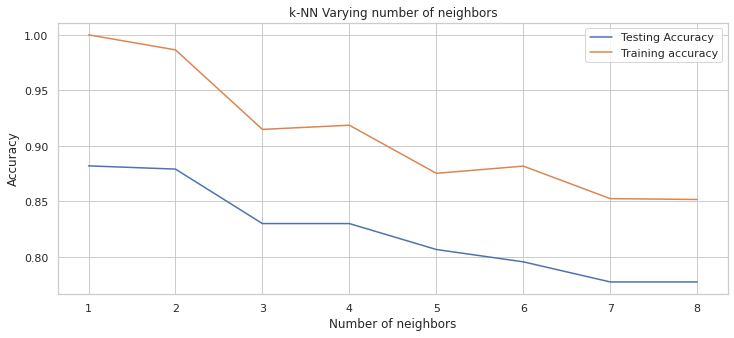

In [283]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [284]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=5)

In [285]:
# Fit the model
knn.fit(X_train_res,y_train_res)

KNeighborsClassifier()

In [286]:
knn.score(X_test_res,y_test_res)

0.8067717454757735

In [287]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix,roc_curve

In [288]:
# Let us get the predictions using the classifier we had fit above
y_pred_test = knn.predict(X_test_res)
y_pred_train = knn.predict(X_train_res)

In [289]:
#Accuracy score, confusion matrix and classification report of training 
knn_acc_train = accuracy_score(y_train_res,y_pred_train)*100
print(knn_acc_train)
print(confusion_matrix(y_train_res,y_pred_train))
print(classification_report(y_train_res,y_pred_train))

87.53441802252816
[[1535  446]
 [  52 1962]]
              precision    recall  f1-score   support

           0       0.97      0.77      0.86      1981
           1       0.81      0.97      0.89      2014

    accuracy                           0.88      3995
   macro avg       0.89      0.87      0.87      3995
weighted avg       0.89      0.88      0.87      3995



In [290]:
#Accuracy score, confusion matrix and classification report of testing
knn_acc_test = accuracy_score(y_test_res,y_pred_test)*100
print(rfc_acc_test)
print(confusion_matrix(y_test_res,y_pred_test))
print(classification_report(y_test_res,y_pred_test))

72.21249270286047
[[600 273]
 [ 58 782]]
              precision    recall  f1-score   support

           0       0.91      0.69      0.78       873
           1       0.74      0.93      0.83       840

    accuracy                           0.81      1713
   macro avg       0.83      0.81      0.80      1713
weighted avg       0.83      0.81      0.80      1713



In [291]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [292]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

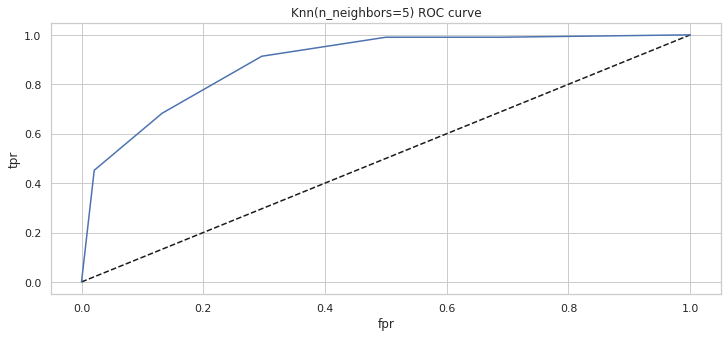

In [293]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=5) ROC curve')
plt.show()

In [294]:
# Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8894063253819351

# Hyperparameter tuning using GridSearchCV on KNN

In [295]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [296]:
# In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [297]:
knn= KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=4)


In [298]:
knn_cv.fit(X_train_res,y_train_res)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [299]:
knn_cv.fit(X_test_res,y_test_res) #X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size = 0.20, random_state=0)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [300]:
y_pred_train_knn_cv = knn_cv.predict(X_train_res)

In [301]:
y_pred_test_knn_cv =  knn_cv.predict(X_test_res)

In [302]:
#Accuracy score, confusion matrix and classification report of training 
knn_cv_acc_train = accuracy_score(y_train_res,y_pred_train_knn_cv)*100
print(knn_cv_acc_train)
print(confusion_matrix(y_train_res,y_pred_train_knn_cv))
print(classification_report(y_train_res,y_pred_train_knn_cv))

79.09887359198999
[[1373  608]
 [ 227 1787]]
              precision    recall  f1-score   support

           0       0.86      0.69      0.77      1981
           1       0.75      0.89      0.81      2014

    accuracy                           0.79      3995
   macro avg       0.80      0.79      0.79      3995
weighted avg       0.80      0.79      0.79      3995



In [303]:
#Accuracy score, confusion matrix and classification report of training 
knn_cv_acc_test = accuracy_score(y_test_res,y_pred_test_knn_cv)*100
print(knn_cv_acc_test)
print(confusion_matrix(y_test_res,y_pred_test_knn_cv))
print(classification_report(y_test_res,y_pred_test_knn_cv))

100.0
[[873   0]
 [  0 840]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       873
           1       1.00      1.00      1.00       840

    accuracy                           1.00      1713
   macro avg       1.00      1.00      1.00      1713
weighted avg       1.00      1.00      1.00      1713



# Implementing Support Vector Machine

In [304]:
from sklearn.svm import SVC

In [305]:
svc = SVC(C=100,gamma=0.001,kernel='rbf')

In [306]:
#Fitting SVM on training dataset
svc.fit(X_train_res,y_train_res)

SVC(C=100, gamma=0.001)

In [307]:
#predicting on training dataset
y_pred_train_svm = svc.predict(X_train_res)

In [308]:

#predicting on testing dataset
y_pred_test_svm = svc.predict(X_test_res)

## Classification Evaluation Metrics on SVM.

In [309]:
#Accuracy score, confusion matrix and classification report of training 
acc_svm_train= accuracy_score(y_pred_train_svm,y_train_res)*100
print(acc_svm_train)
cmm = confusion_matrix(y_pred_train_svm,y_train_res)
print(cmm)
crr = classification_report(y_pred_train_svm,y_train_res)
print(crr)

71.01376720901126
[[1335  512]
 [ 646 1502]]
              precision    recall  f1-score   support

           0       0.67      0.72      0.70      1847
           1       0.75      0.70      0.72      2148

    accuracy                           0.71      3995
   macro avg       0.71      0.71      0.71      3995
weighted avg       0.71      0.71      0.71      3995



In [310]:
acc_svm_test = accuracy_score(y_test_res,y_pred_test_svm)*100
print(acc_svm_test)
print(confusion_matrix(y_pred_test_svm,y_test_res))
print(classification_report(y_pred_test_svm,y_test_res))

69.76065382370112
[[587 232]
 [286 608]]
              precision    recall  f1-score   support

           0       0.67      0.72      0.69       819
           1       0.72      0.68      0.70       894

    accuracy                           0.70      1713
   macro avg       0.70      0.70      0.70      1713
weighted avg       0.70      0.70      0.70      1713



# Hyperparameter tuning using GridSearchCV on SVM

In [311]:
from sklearn.model_selection import GridSearchCV

In [312]:
#Making a parameters dict where all parameters is of SVM
param_grid={'C':[0.1,1,10,30,50,80,100,1000],'gamma':[1,0.1,0.001,0.0001],'kernel':['rbf']}

In [313]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=10)

In [314]:
#Fitting on training dataset
grid.fit(X_train_res,y_train_res)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5; 1/32] START C=0.1, gamma=1, kernel=rbf.................................
[CV 1/5; 1/32] END ..C=0.1, gamma=1, kernel=rbf;, score=0.522 total time=   0.9s
[CV 2/5; 1/32] START C=0.1, gamma=1, kernel=rbf.................................
[CV 2/5; 1/32] END ..C=0.1, gamma=1, kernel=rbf;, score=0.522 total time=   0.9s
[CV 3/5; 1/32] START C=0.1, gamma=1, kernel=rbf.................................
[CV 3/5; 1/32] END ..C=0.1, gamma=1, kernel=rbf;, score=0.531 total time=   0.9s
[CV 4/5; 1/32] START C=0.1, gamma=1, kernel=rbf.................................
[CV 4/5; 1/32] END ..C=0.1, gamma=1, kernel=rbf;, score=0.534 total time=   0.9s
[CV 5/5; 1/32] START C=0.1, gamma=1, kernel=rbf.................................
[CV 5/5; 1/32] END ..C=0.1, gamma=1, kernel=rbf;, score=0.534 total time=   0.8s
[CV 1/5; 2/32] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 1/5; 2/32] END C=0.1, gamma=0.1, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 30, 50, 80, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['rbf']},
             verbose=10)

In [315]:
#getting the best parameters
grid.best_params_

{'C': 30, 'gamma': 1, 'kernel': 'rbf'}

In [321]:
svc_2 = SVC(C=30,gamma=1,kernel='rbf')

In [322]:
#Fitting on training dataset using the best parameters
svc_2.fit(X_train_res,y_train_res)

SVC(C=30, gamma=1)

In [323]:
#predicting on training and testing dataset after using the best parameters
y_pred_train_svm_grid = svc_2.predict(X_train_res)
y_pred_test_svm_grid = svc_2.predict(X_test_res)

## Classification Evaluation Metrics on SVM after Hyperparameter tuning

In [324]:
#Accuracy score, confusion matrix and classification report of training 
acc_svm_train_grid = accuracy_score(y_train_res,y_pred_train_svm_grid)*100
print(acc_svm_train_grid)
cmm_svm_train_grid = confusion_matrix(y_pred_train_svm_grid,y_train_res)
print(cmm_svm_train_grid)
crr_svm_train_grid = classification_report(y_pred_train_svm_grid,y_train_res)
print(crr_svm_train_grid)

100.0
[[1981    0]
 [   0 2014]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1981
           1       1.00      1.00      1.00      2014

    accuracy                           1.00      3995
   macro avg       1.00      1.00      1.00      3995
weighted avg       1.00      1.00      1.00      3995



In [325]:
#Accuracy score, confusion matrix and classification report of testing
acc_svm_test_grid = accuracy_score(y_test_res,y_pred_test_svm_grid)*100
print(acc_svm_test_grid)
print(confusion_matrix(y_pred_test_svm_grid,y_test_res))
print(classification_report(y_pred_test_svm_grid,y_test_res))

90.19264448336253
[[794  89]
 [ 79 751]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       883
           1       0.89      0.90      0.90       830

    accuracy                           0.90      1713
   macro avg       0.90      0.90      0.90      1713
weighted avg       0.90      0.90      0.90      1713



# Comparision of evaluation metrics of the models being used

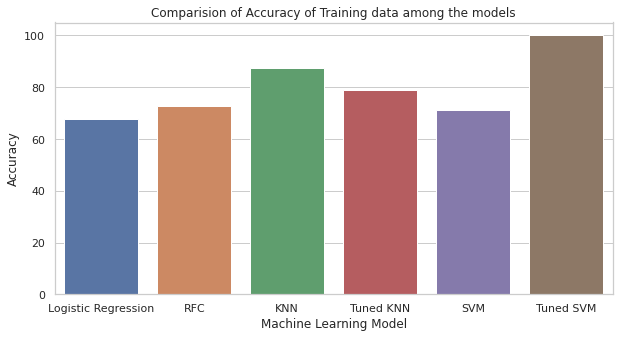

In [326]:
models = ['Logistic Regression','RFC','KNN','Tuned KNN','SVM','Tuned SVM']
acc = [log_acc_train,rfc_acc_train,knn_acc_train,knn_cv_acc_train,acc_svm_train,acc_svm_train_grid]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.ylabel("Accuracy")
plt.xlabel("Machine Learning Model")
sns.barplot(x= models, y= acc)
plt.title('Comparision of Accuracy of Training data among the models')
plt.show()

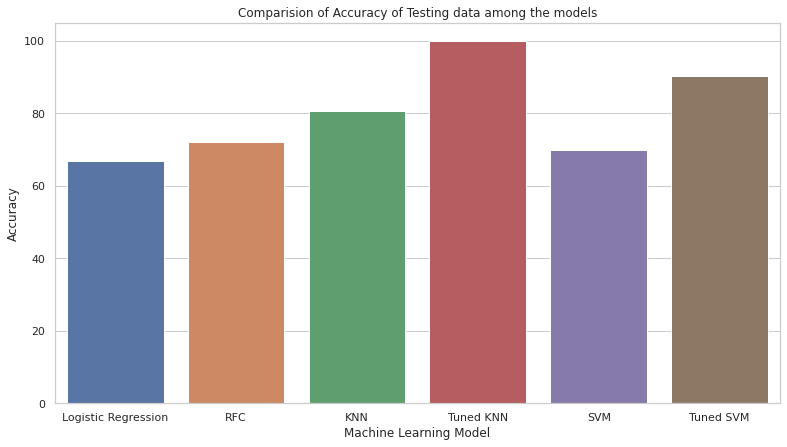

In [327]:
models = ['Logistic Regression','RFC','KNN','Tuned KNN','SVM','Tuned SVM']
acc = [log_acc_test,rfc_acc_test,knn_acc_test,knn_cv_acc_test,acc_svm_test,acc_svm_test_grid]

sns.set_style("whitegrid")
plt.figure(figsize=(13,7))
plt.ylabel("Accuracy")
plt.xlabel("Machine Learning Model")
sns.barplot(x= models, y= acc)
plt.title('Comparision of Accuracy of Testing data among the models')
plt.show()

Tuned KNN and Tuned Svm performing well compere to other models

*The following columns lie in the range:

totChol: 150 to 300 , sysBP: 100 to 150, diaBP: 60 to 100 ,BMI: 20 to 30, heartRate: 50 to 100 glucose: 50 to 150 *Mid-age groups ranging from the age of 38 - 46 have more number of currentSmokers

* No currentSmokers observed below the age of 32
* Maximum age for a currentSmokers is 70
* Males have shown a slightly higher risk of coronary heart disease TenYearCHD.
* Mid-age groups ranging from the age of 38 - 46 have more number of currentSmokers
* No currentSmokers observed below the age of 32
* Low cigsPerDay comes with lower risk of CHD.
* Those who don't smoke, i.e., with a cigsPerDay of 0.0 has a really low risk of contracting the disease
* Minor relation of higher risk of TenYearCHD found with higher sysBP AND higher diaBP
* Majority of people with sysBP ranging from 72 - 130 has lower chance of contracting the disease.
* Majority of people with diaBP ranging upto 80.0 has lower chance of contracting the disease.
Again, age, total cholesterol level, diastolic blood pressure, BMI, and glucose level are the main culprits leading to heart diseases,especially CHD.
These models show that our analysis is highly accurate. Since Light GBM gives the best score in testing(95%), we can trust on this model,
[Tuned KNN and Tuned Svm ]

In [211]:

def Almabetter_cardiovescular_diagonasis():
    print("Welcome to Almabetter_cardiovescular_diagonasis:")
    print("Hay I'm Dr.ArunTeja Lonka , from AlmaBetter,")
    name = input("Please Enter your Name:\n")
    print(f'{name}, Please Fill below data carefully to get reports:')
    age = int(input(f'Hello {name},please enter your age:\n  '))
    Gender = str(input(f"hay {name} can you confirm your Gender: (Type: male/female/other)"))
    if Gender == 'male':
        sex = 0
    else:
        sex = 1
    smoking = input(f"{name}, Are you smoker? (yes/no)")
    print("use small letter only for type yes/no")
    if smoking == 'yes':
        smo = 1
        cig_per_day = int(input(f"How many packets you smoke per day, {name}"))
    else:
        smo = 0
        cig_per_day = 0
    bp_med = input(f"{name} are you using any blood pressure medication: (type:yes/no)")
    if bp_med == 'yes':
        bp = 1
    else:
        bp = 0

    Prevalent_Stoke = input(f"hay,{name} have you face any heart stroke previously?:((type:yes/no) ")
    if Prevalent_Stoke == 'yes':
        p_s = 1
    else:
        p_s = 0
    Prevalent_Hyp = input(f"hay,{name} are you hypertensive?:((type:yes/no) ")
    if Prevalent_Hyp == 'yes':
        p_h = 1
    else:
        p_h = 0
    Diabetes = input(f"hay,{name} are you Diabetic?:((type:yes/no) ")
    if Diabetes == 'yes':
        dbt = 1
    else:
        dbt = 0
    Tot_chol = float(input(f"{name}, please enter your total cholesterol level \n "))
    sys = float(input(f"{name}, please enter your systolic blood pressure rate :\n"))
    dia_bp = float(input(f"{name}, please enter your dia blood pressure value:\n"))
    bmi = float(input(f"{name}, please enter your Body mass index(BMI)"))
    heart_rate = float(input(f"{name}, please enter your heart rate value:"))
    glocose = float(input("Enter your Glucose level:\n"))

    edu = int(input("Please enter your educational status (if  you are below 10th :type 1) \n (if you are 12+ : type 2) \n (if you are Graduate :type 3) \n (if you are above that : type 4)"))
    list = [age, edu, sex, smo, cig_per_day, bp,p_s, p_h, dbt, Tot_chol, sys, dia_bp, bmi, heart_rate, glocose]
    inp = np.array(list)
    ip = inp.reshape((1, -1))
    print(f".............................{ip}................................................................")
    mp1 = knn_cv.predict(ip)
    mp2 = svc_2.predict(ip)
    if mp1 == 0:
      if mp1==mp2:
        print(f"Hay {name} you are safe you don't have any 10-year risk of coronary heart disease CHD , You can Go home Happily")
        print(f"Thank you for visiting,Keep smiling {name}")
      else:
        print(".........................sever problem.........................")  
        print("Please retry again")
    if mp1 == 1:
      print(f"Hay{name} you have 10-year risk of coronary heart disease CHD, please consult a Doctor as Early as posible:  ") 
      print(f"Don't worry {name}, I will book an appoinment to consult a one the best doctor in city,we are always here to help you:")
      print(f"Thank you for visiting,Keep smiling {name} and don't smoke")

In [212]:
df_copy.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,1,1,3.0,0.0,0,0,0,221.0,148.0,85.0,0.00,90.0,80.0,1
1,36,4.0,0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,1,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,1,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [349]:
Almabetter_cardiovescular_diagonasis()

Welcome to Almabetter_cardiovescular_diagonasis:
Hay I'm Dr.ArunTeja Lonka , from AlmaBetter,
Please Enter your Name:
upasana
upasana, Please Fill below data carefully to get reports:
Hello upasana,please enter your age:
  50
hay upasana can you confirm your Gender: (Type: male/female/other)female
upasana, Are you smoker? (yes/no)yes
use small letter only for type yes/no
How many packets you smoke per day, upasana20
upasana are you using any blood pressure medication: (type:yes/no)no
hay,upasana have you face any heart stroke previously?:((type:yes/no) no
hay,upasana are you hypertensive?:((type:yes/no) yes
hay,upasana are you Diabetic?:((type:yes/no) no
upasana, please enter your total cholesterol level 
 233
upasana, please enter your systolic blood pressure rate :
148
upasana, please enter your dia blood pressure value:
88
upasana, please enter your Body mass index(BMI)28.26
upasana, please enter your heart rate value:68
Enter your Glucose level:
94
Please enter your educational sta

I  can enter the details of row 4 and I get exact answer...
i hope my model is good to predict...
